In [101]:
import pandas as pd
import numpy as np
import os

In [102]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import sklearn

In [103]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [104]:
data=pd.read_csv('diabetes.csv')

In [105]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [106]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [107]:
feature_columns=[ 'Glucose', 'BloodPressure', 'SkinThickness' ,'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [108]:
pd.isnull(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [109]:
data['Glucose'][0]

148

In [110]:
feature_columns

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction']

In [111]:
#cleaning missing values  or zeros  in data
for i in feature_columns:
    for j in range(0,768):
        if data[i][j]==0:
            data[i][j]=data[i].mean(skipna=True)
data        


<ipython-input-111-f4fd4d1a7f9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j]=data[i].mean(skipna=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,129,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,27,129,30.1,0.349,47,1


In [112]:
transformed_data=data
transformed_data.head().style.highlight_max(color='blue').highlight_min(color='red')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.600000,0.627000,50,1
1,1,85,66,29,79,26.600000,0.351000,31,0
2,8,183,64,20,80,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


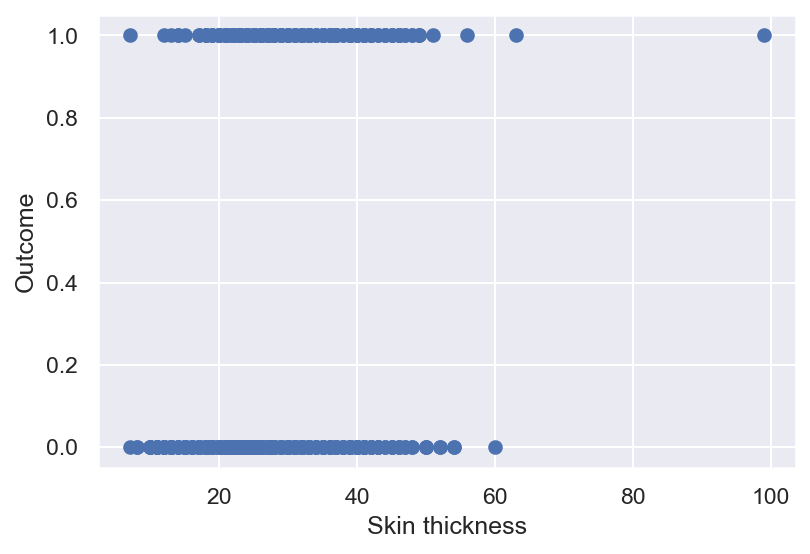

In [113]:
#basic visalization
plt.figure(dpi=150)
plt.scatter(data['SkinThickness'],data['Outcome'])
plt.xlabel('Skin thickness')
plt.ylabel('Outcome')
plt.show()

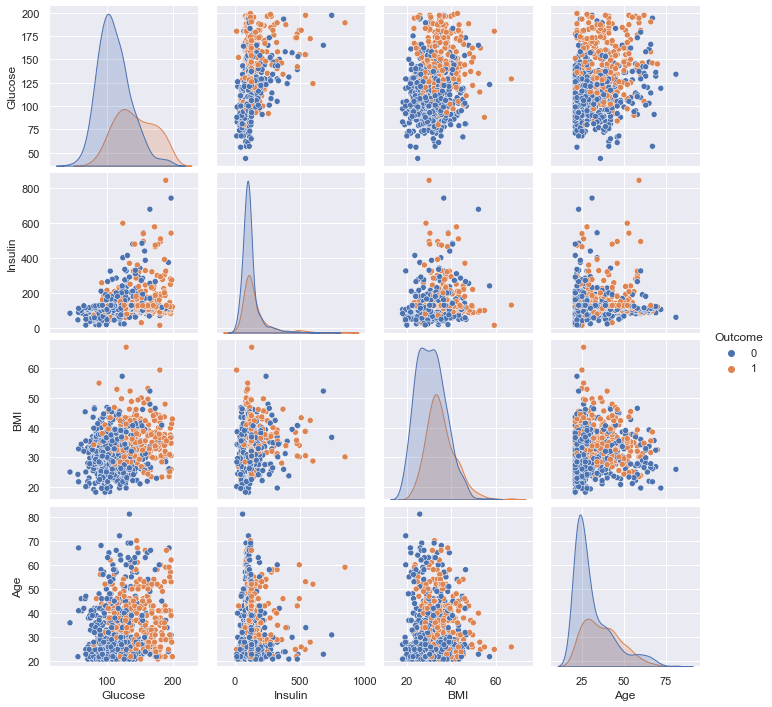

In [114]:
#Exploratory data analysis using pairplot

graph = ['Glucose','Insulin','BMI','Age','Outcome']
sns.set()
print(sns.pairplot(transformed_data[graph],hue='Outcome'))

In [115]:
X=transformed_data[feature_columns]
Y=data['Outcome']

In [116]:
#splitting
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,Y,train_size=0.80)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((614, 6), (154, 6), (614,), (154,))

In [117]:
#featureScaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [118]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=10)
random_forest_model.fit(x_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [119]:
predict_train_data=random_forest_model.predict(x_test)
print("ACCURACY FOR RANDOM FOREST MODEL",format(metrics.accuracy_score(y_test,predict_train_data)))

ACCURACY FOR RANDOM FOREST MODEL 0.7402597402597403
